# 1. 详解神经网络的组成部分

## 1.1 层 —— 神经网络的基本组成

In [4]:
import time

from torch.nn import Linear
import torch
import os
from train_helper.env import *

set_train_message_send(True)
set_train_torch_device("mps")

DEFAULT_DEVICE = get_train_torch_device()

layer = Linear(in_features=10, out_features=5, bias=True, device=DEFAULT_DEVICE)

layer(torch.randn(1, 10, device=DEFAULT_DEVICE))

layer.weight, layer.bias

(Parameter containing:
 tensor([[ 1.9932e-01, -1.1648e-01,  2.9160e-01, -1.8327e-01, -4.2081e-02,
          -2.8643e-01,  2.4654e-01,  2.1555e-01, -1.7010e-01, -2.3978e-01],
         [-1.2369e-01,  6.9402e-02, -2.7991e-02, -2.9873e-01, -8.7921e-02,
          -9.8185e-02, -1.4633e-01,  2.3103e-01, -2.4856e-01, -2.6906e-01],
         [ 6.9908e-02,  2.3507e-01, -2.4510e-01, -9.4267e-02,  1.2594e-01,
          -2.3405e-01, -6.1074e-02, -1.2096e-01, -8.0214e-02,  8.1495e-02],
         [ 1.8381e-01,  2.6911e-01,  2.1612e-01,  2.4442e-01, -3.6631e-02,
          -2.7949e-02,  3.1093e-01,  3.0702e-01,  2.2213e-02,  8.3047e-03],
         [ 1.0005e-01,  3.1459e-01, -1.6232e-01, -2.4054e-01, -1.6872e-01,
           1.8630e-04, -1.7923e-01,  2.5628e-01,  5.8676e-02, -2.7064e-02]],
        device='mps:0', requires_grad=True),
 Parameter containing:
 tensor([-0.1516, -0.2981, -0.1428, -0.2377, -0.1811], device='mps:0',
        requires_grad=True))

一些流行的非线性函数：
* sigmoid
* tanh
* ReLU
* Leaky ReLU

## 1.2 PyTorch 中的非线性激活函数

In [5]:
from torch.nn import ReLU, MSELoss

simple_data = torch.Tensor([1, 2, -1, -1])

relu = ReLU()
relu(simple_data)

tensor([1., 2., 0., 0.])

In [6]:
mse_loss = MSELoss()

X = torch.randn(3, 5, requires_grad=True)
y = torch.randn(3, 5)

output = mse_loss(X, y)

output, output.backward()

(tensor(3.9423, grad_fn=<MseLossBackward0>), None)

PyTorch 提供的优化器
* ADADELTA
* Adagrad
* Adam
* SparseAdam
* Adamax
* ASGD
* LBFGS
* RMSProp
* Rprop
* SGD

## 1.3 使用深度学习对图像进行分类

处理数据集，处理成 ImageFolder 可以处理的路径格式。

In [1]:
from dot_cat_dataset import DOG_CAT_DATASET_PATH
from dot_cat_train import DogCatModule


dog_cat_module = DogCatModule()
dog_cat_module.load_image(DOG_CAT_DATASET_PATH)

full_images = dog_cat_module.full_images
full_images.class_to_idx, full_images.class_to_idx

train on mps


({'Cat': 0, 'Dog': 1}, {'Cat': 0, 'Dog': 1})

将张量可视化

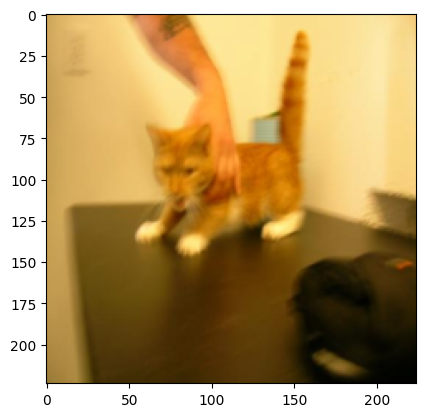

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch

def imshow(inp: torch.Tensor):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)

imshow(dog_cat_module.full_images[0][0])

切分数据集

In [3]:
dog_cat_module.split_dataset()

dog_cat_module.train_data_loader, dog_cat_module.test_data_loader

(<torch.utils.data.dataloader.DataLoader at 0x2970a5810>,
 <torch.utils.data.dataloader.DataLoader at 0x2970bc410>)

使用 ResNet 神经网络

训练模型:

In [4]:
dog_cat_module.train(epoch=1)

epoch [1/1] start...
[64/20000]: loss: 0.7476488947868347  f1 score: 0.29787234042553196
Train on Mac, break...
Test Error: 
 Accuracy: 65.4%, Avg loss: 0.627306 

epoch [1/1] end, use: 53.88552403450012
